# (11주차) 11월9일 -- draft
> 판다스백엔드
- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

## import 

In [13]:
import numpy as np 
import pandas as pd 
from IPython.display import HTML

In [14]:
#
#!pip install pandas_datareader 
from pandas_datareader import data as pdr 

In [65]:
def show(fig): 
    return HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False, config=dict({'scrollZoom':False})))

## line

### data1: 야후 파이낸스

`-` yahoo finance: https://finance.yahoo.com/

In [68]:
symbols = ['AMZN','AAPL','GOOG','MSFT','NFLX','NVDA','TSLA']
start = '2020-01-01'
end = '2022-10-30'
df = pdr.get_data_yahoo(symbols,start,end)['Adj Close']

In [69]:
df

Symbols,AMZN,AAPL,GOOG,MSFT,NFLX,NVDA,TSLA
Date,,,,,,,
2019-12-31,92.391998,71.920586,66.850998,153.745255,323.570007,58.637024,27.888666
2020-01-02,94.900497,73.561539,68.368500,156.592010,329.809998,59.785839,28.684000
2020-01-03,93.748497,72.846359,68.032997,154.642166,325.899994,58.828915,29.534000
2020-01-06,95.143997,73.426811,69.710503,155.041870,335.829987,59.075619,30.102667
2020-01-07,95.343002,73.081490,69.667000,153.628265,330.750000,59.790829,31.270666
...,...,...,...,...,...,...,...
2022-10-24,119.820000,149.202484,102.970001,247.250000,282.450012,125.989998,211.250000
2022-10-25,120.599998,152.087708,104.930000,250.660004,291.019989,132.610001,222.419998
2022-10-26,115.660004,149.102661,94.820000,231.320007,298.619995,128.960007,224.639999


### matplotlib: 1개의 y를 그리기

`-` 예시1: 1개의 y를 그리기

<AxesSubplot:xlabel='Date'>

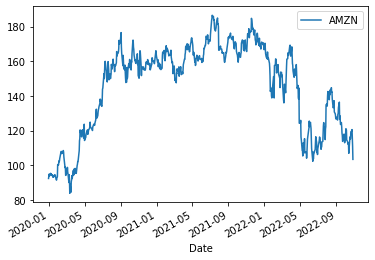

In [70]:
df.reset_index().plot(x='Date',y='AMZN')

<AxesSubplot:xlabel='Date'>

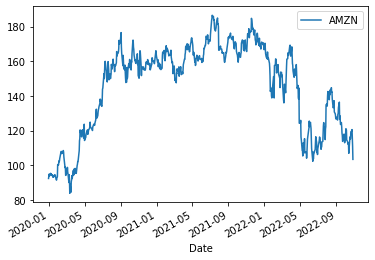

In [71]:
df.reset_index().plot(x='Date',y='AMZN',kind='line')

<AxesSubplot:xlabel='Date'>

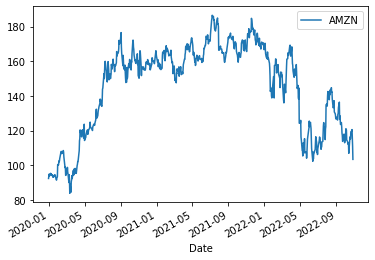

In [72]:
df.reset_index().plot.line(x='Date',y='AMZN')

### matplotlib: 2개의 y를 겹쳐서 그리기

`-` 2개의 y를 겹쳐그리기

<AxesSubplot:xlabel='Date'>

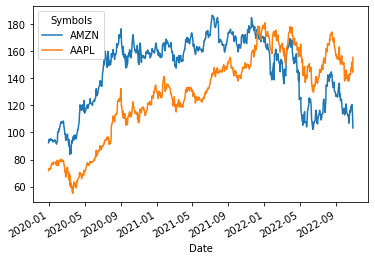

In [73]:
df.reset_index().plot(x='Date',y=['AMZN','AAPL'])

### matplotlib: 모든 y를 겹쳐서 그리기

`-` 모든 y를 겹쳐서 그리기

<AxesSubplot:xlabel='Date'>

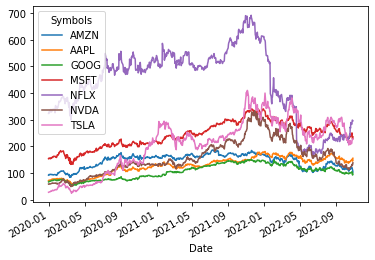

In [74]:
df.reset_index().plot(x='Date')

### matplotlib: 그림크기조정

`-` 모든 y를 겹쳐서 그리기 + 그림크기조정 

<AxesSubplot:xlabel='Date'>

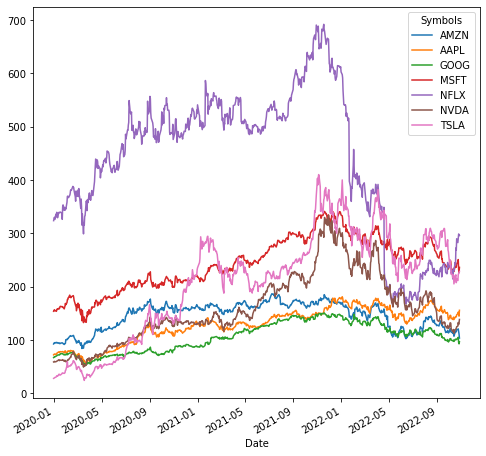

In [75]:
df.reset_index().plot(x='Date',figsize=(8,8))

### matplotlib: 서브플랏

`-` 예시1: 기본 서브플랏 

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

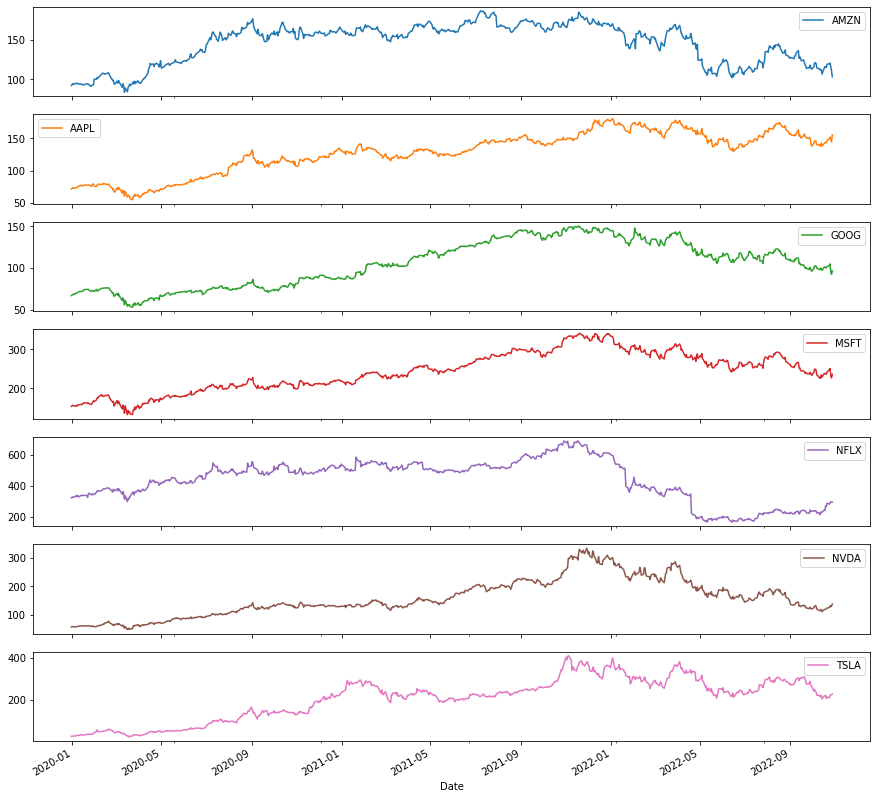

In [76]:
df.reset_index().plot.line(x='Date',subplots=True,figsize=(15,15))

`-` 예시2: 레이아웃 조정 

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

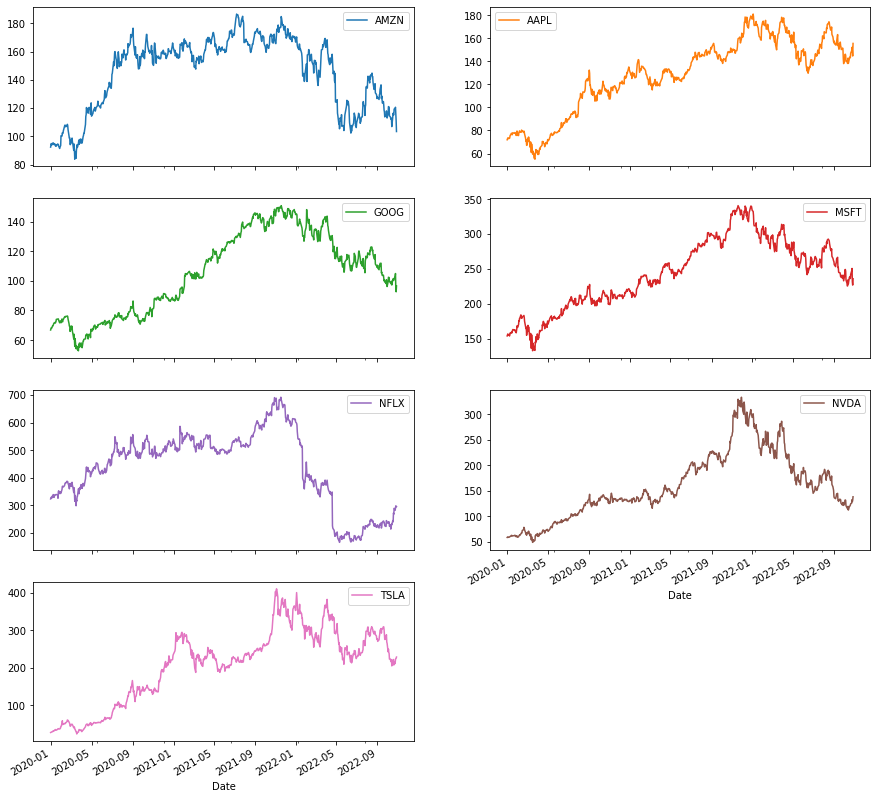

In [77]:
df.reset_index().plot.line(x='Date',subplots=True,figsize=(15,15),layout=(4,2))

### matplotlib: 폰트조정 

`-` 예시1

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

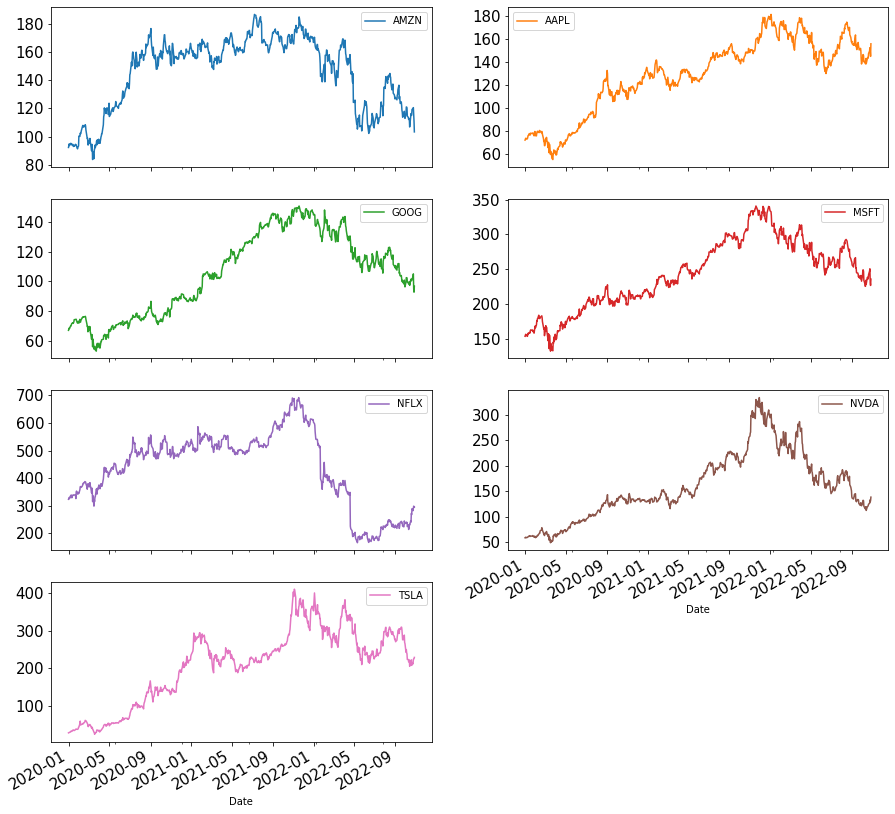

In [78]:
df.reset_index().plot.line(x='Date',subplots=True,figsize=(15,15),layout=(4,2),fontsize=15)

### matplotlib: 레전드삭제

`-` 레전드삭제 

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

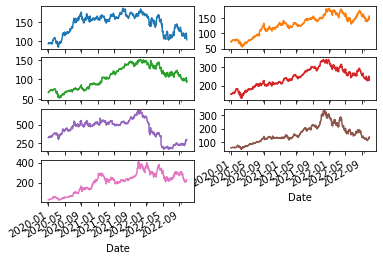

In [79]:
df.reset_index().plot.line(x='Date',subplots=True,layout=(4,2),legend=False)

### plotly 모든y를 겹쳐서 그리기 

In [82]:
fig = df.reset_index().melt(id_vars='Date').plot.line(backend='plotly',x='Date',y='value',color='Symbols')
show(fig)

## bar

### data2: 핸드폰점유율 

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/kalilurrahman/datasets/main/mobilephonemktshare2020.csv')
df

,Date,Samsung,Apple,Huawei,Xiaomi,Oppo,Mobicel,Motorola,LG,Others,Realme,Google,Nokia,Lenovo,OnePlus,Sony,Asus
0,2019-10,31.49,22.09,10.02,7.79,4.10,3.15,2.41,2.40,9.51,0.54,2.35,0.95,0.96,0.70,0.84,0.74
1,2019-11,31.36,22.90,10.18,8.16,4.42,3.41,2.40,2.40,9.10,0.78,0.66,0.97,0.97,0.73,0.83,0.75
2,2019-12,31.37,24.79,9.95,7.73,4.23,3.19,2.50,2.54,8.13,0.84,0.75,0.90,0.87,0.74,0.77,0.70
3,2020-01,31.29,24.76,10.61,8.10,4.25,3.02,2.42,2.40,7.55,0.88,0.69,0.88,0.86,0.79,0.80,0.69
4,2020-02,30.91,25.89,10.98,7.80,4.31,2.89,2.36,2.34,7.06,0.89,0.70,0.81,0.77,0.78,0.80,0.69
5,2020-03,30.80,27.03,10.70,7.70,4.30,2.87,2.35,2.28,6.63,0.93,0.73,0.72,0.74,0.78,0.76,0.66
6,2020-04,30.41,28.79,10.28,7.60,4.20,2.75,2.51,2.28,5.84,0.90,0.75,0.69,0.71,0.80,0.76,0.70
7,2020-05,30.18,26.72,10.39,8.36,4.70,3.12,2.46,2.19,6.31,1.04,0.70,0.73,0.77,0.81,0.78,0.76
8,2020-06,31.06,25.26,10.69,8.55,4.65,3.18,2.57,2.11,6.39,1.04,0.68,0.74,0.75,0.77,0.78,0.75
9,2020-07,30.95,24.82,10.75,8.94,4.69,3.46,2.45,2.03,6.41,1.13,0.65,0.76,0.74,0.76,0.75,0.72


### matplotlib: 2개의 y를 겹쳐그리기 

`-` 예시1

<AxesSubplot:xlabel='Date'>

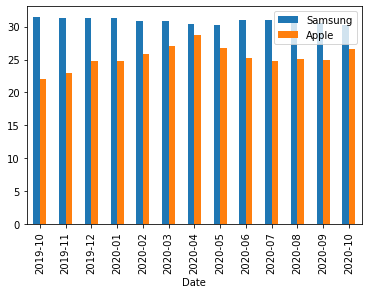

In [86]:
df.plot.bar(x='Date',y=['Samsung','Apple'])

`-` 예시2: width 옵션으로 폭조정

<AxesSubplot:xlabel='Date'>

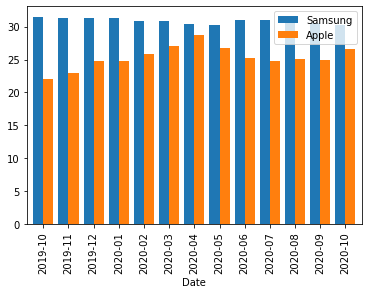

In [89]:
df.plot.bar(x='Date',y=['Samsung','Apple'],width=0.8)

### matplotlib: 2개의 y를 겹쳐그리기 + x,y 플립

`-` 예시1: barh를 이용하여 플립

<AxesSubplot:ylabel='Date'>

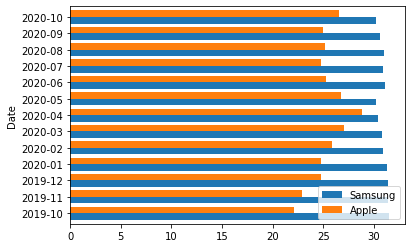

In [90]:
df.plot.barh(x='Date',y=['Samsung','Apple'],width=0.8)

### plotly: 모든y를 stacked bar로 나타내기

`-` 예시1

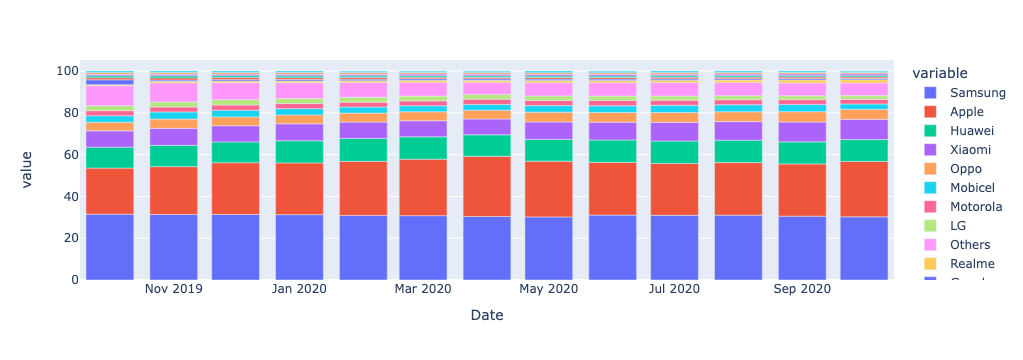

In [97]:
df.melt(id_vars='Date').plot.bar(backend='plotly',x='Date',y='value',color='variable')

### plotly: 3개의 y를 겹쳐그리기 

`-` 예시1

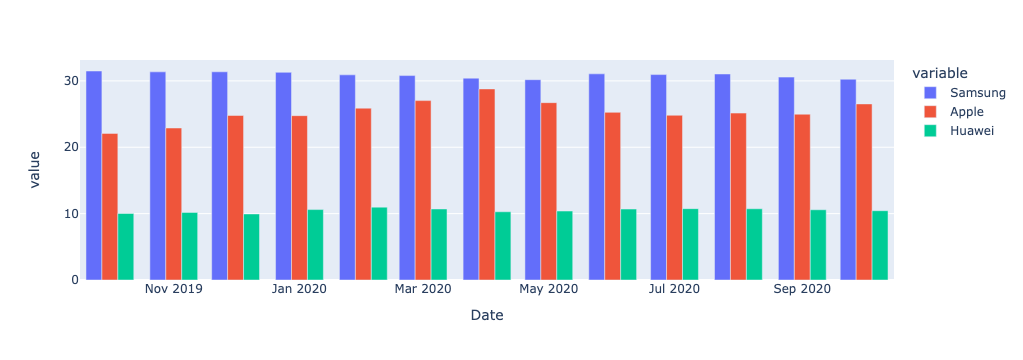

In [101]:
df.melt(id_vars='Date').query(' variable=="Samsung" or variable=="Apple" or variable=="Huawei"')\
.plot.bar(backend='plotly',x='Date',y='value',color='variable',barmode='group')

### plotly: 3개의 y를 겹쳐그리기 + text

`-` 예시1

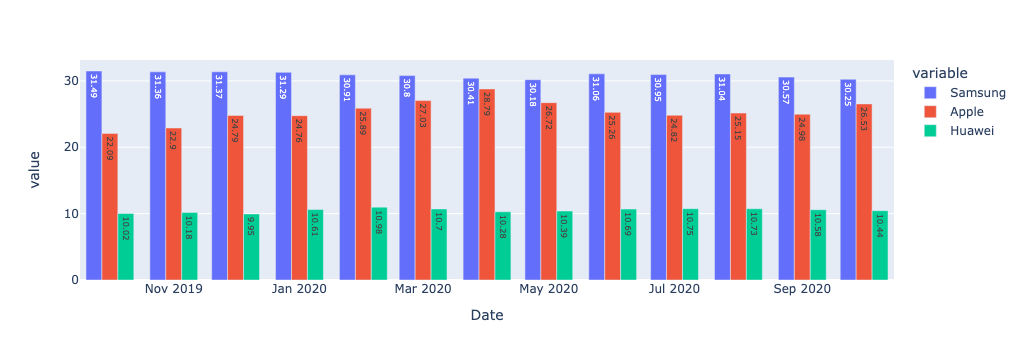

In [107]:
df.melt(id_vars='Date').query(' variable=="Samsung" or variable=="Apple" or variable=="Huawei"')\
.plot.bar(backend='plotly',x='Date',y='value',color='variable',barmode='group',text='value')

### plotly: 면분할로 subplot그리기 (facet_col)

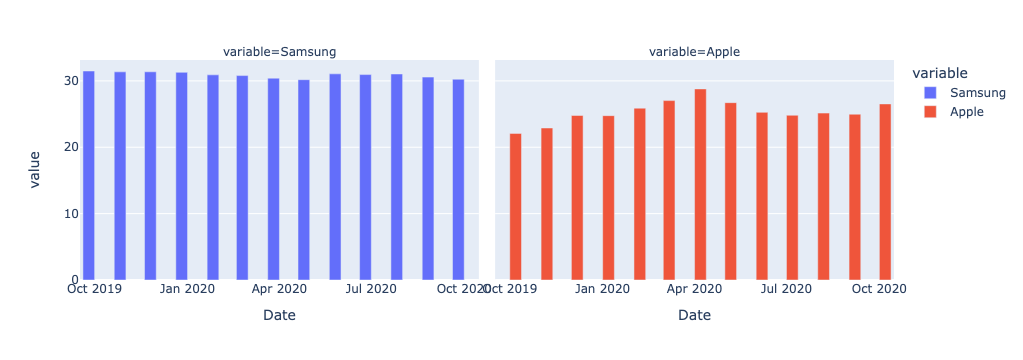

In [110]:
df.melt(id_vars='Date').query(' variable=="Samsung" or variable=="Apple"')\
.plot.bar(backend='plotly',x='Date',y='value',color='variable',barmode='group',facet_col='variable')

### plotly: 면분할로 subplot그리기 (facet_row)

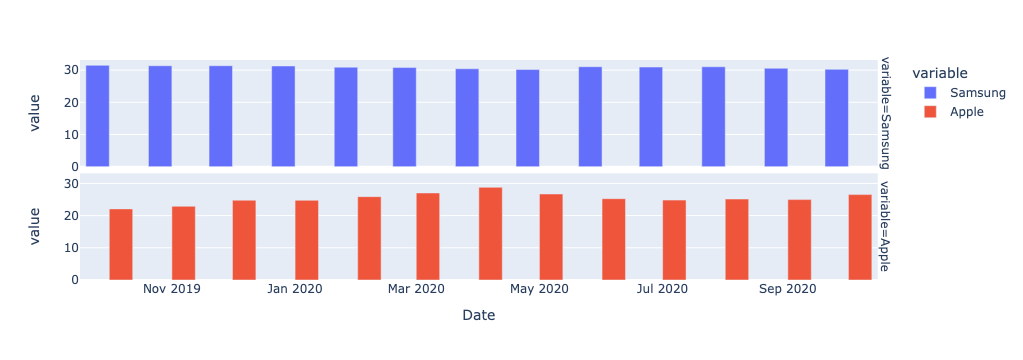

In [111]:
df.melt(id_vars='Date').query(' variable=="Samsung" or variable=="Apple"')\
.plot.bar(backend='plotly',x='Date',y='value',color='variable',barmode='group',facet_row='variable')

## boxplot 

### data3: 팁

In [112]:
import plotly.express as px 
df = px.data.tips() 
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### plotly: 팁의 박스플랏

`-` y='tip'

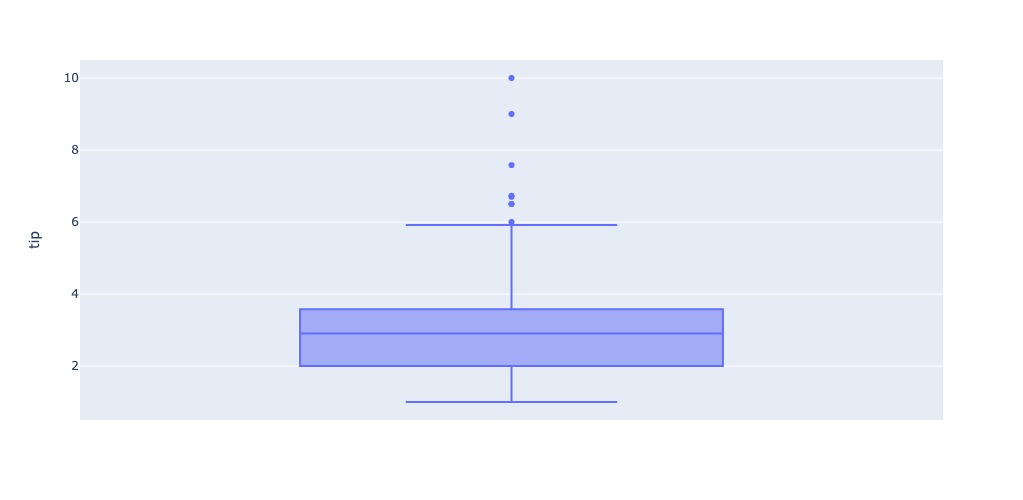

In [115]:
df.plot.box(backend='plotly',y='tip',width=500,height=500)

### plotly: 시간에 따른 팁의 박스플랏

`-` y=`'tip'`, x=`'time'`

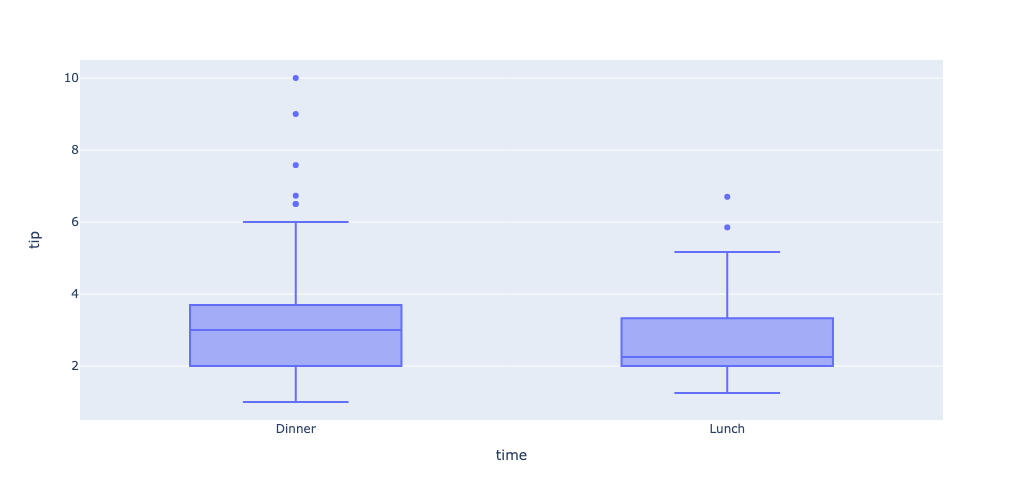

In [119]:
df.plot.box(backend='plotly',x='time',y='tip',width=500,height=500)

- 저녁에 좀 더 잘주는것 같음 

### plotly: 시간과 성별에 따른 팁의 박스플랏

`-` 예시1: y=`'tip'`, x=`'time'`, color=`'sex'`

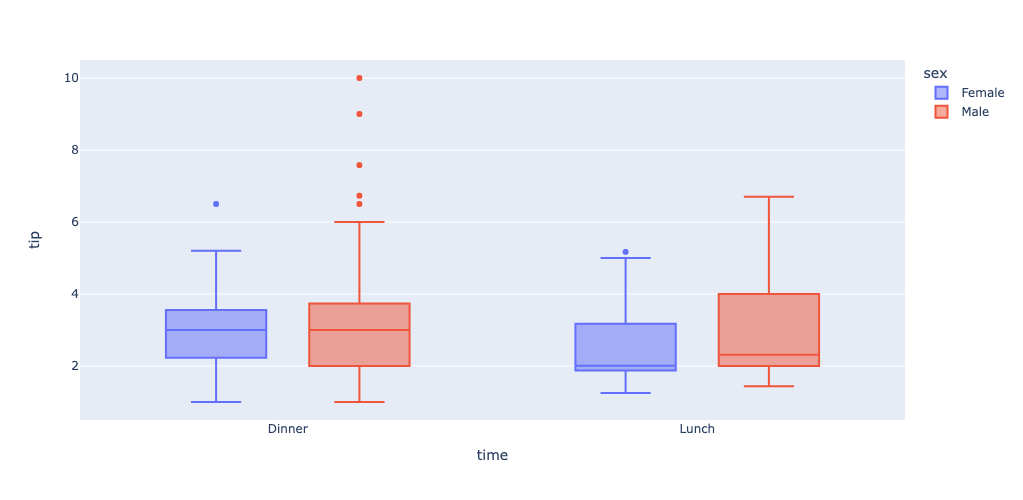

In [120]:
df.plot.box(backend='plotly',x='time',y='tip',color='sex',width=500,height=500)

`-` 예시2: y=`'tip'`, x=`'time'`, color=`'sex'`, points=`'all'`

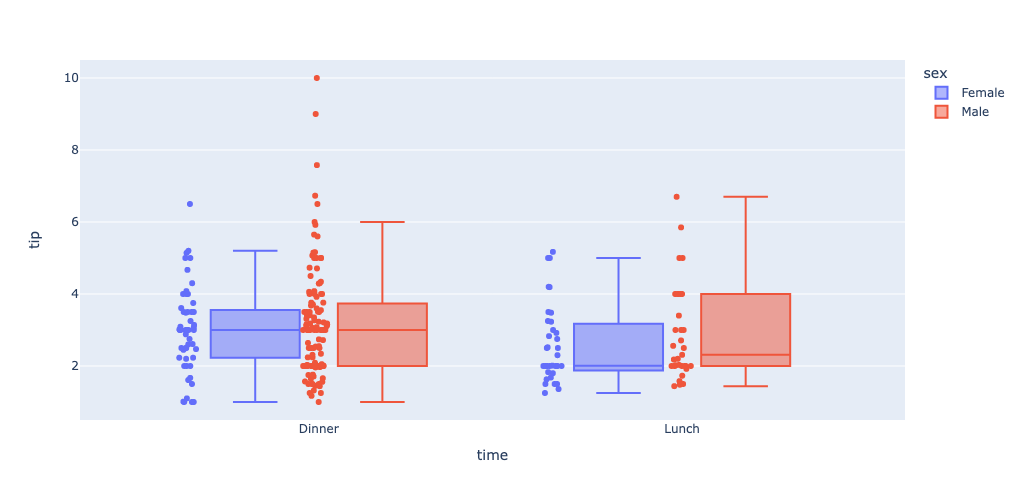

In [121]:
df.plot.box(backend='plotly',x='time',y='tip',color='sex',points='all',width=500,height=500)

### plotly: 시간,성별,요일에 따른 팁의 박스플랏

`-` 예시1: y=`'tip'`, x=`'time'`, color=`'sex'`, facet_col=`'day'`

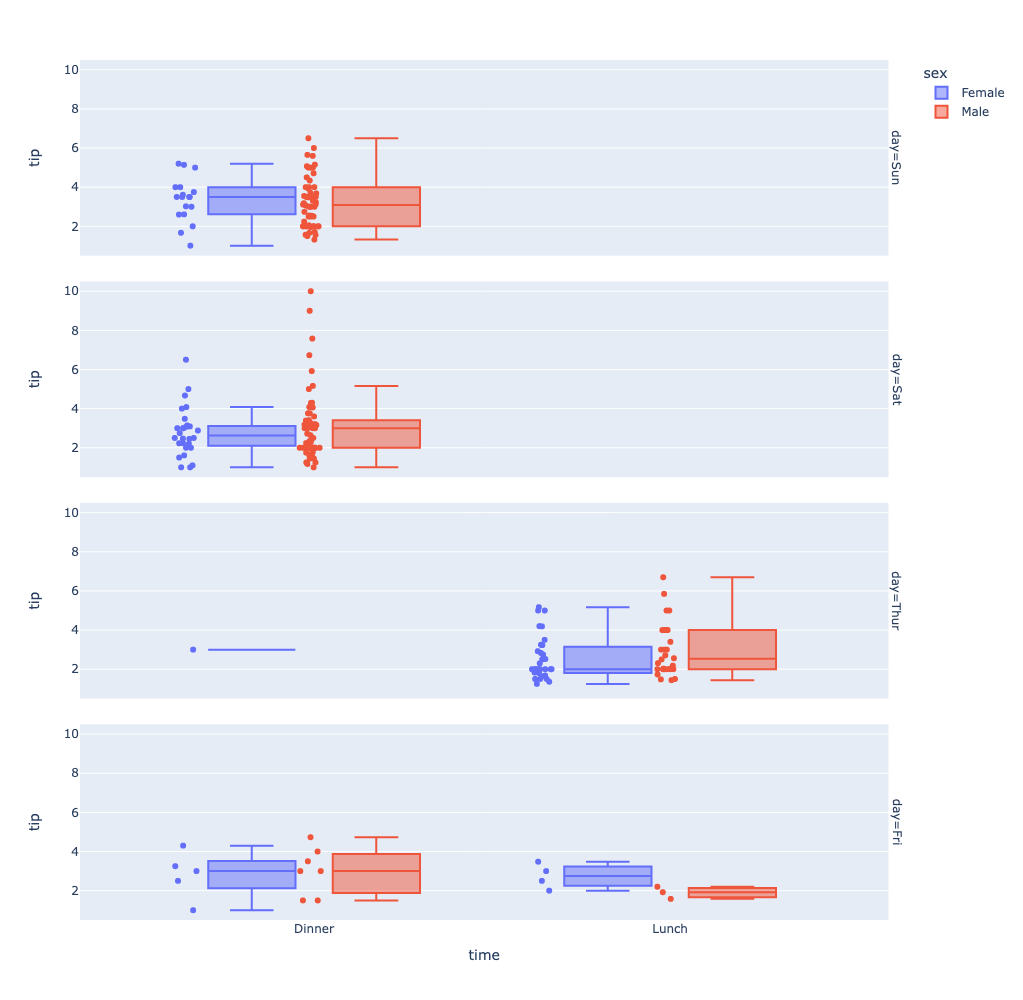

In [128]:
df.plot.box(backend='plotly', facet_row='day',x='time',y='tip',color='sex',points='all',width=500,height=1000)

`-` 예시2: y=`'tip'`, color=`'sex'`, facet_col=`'time'`, facet_row=`'day'`

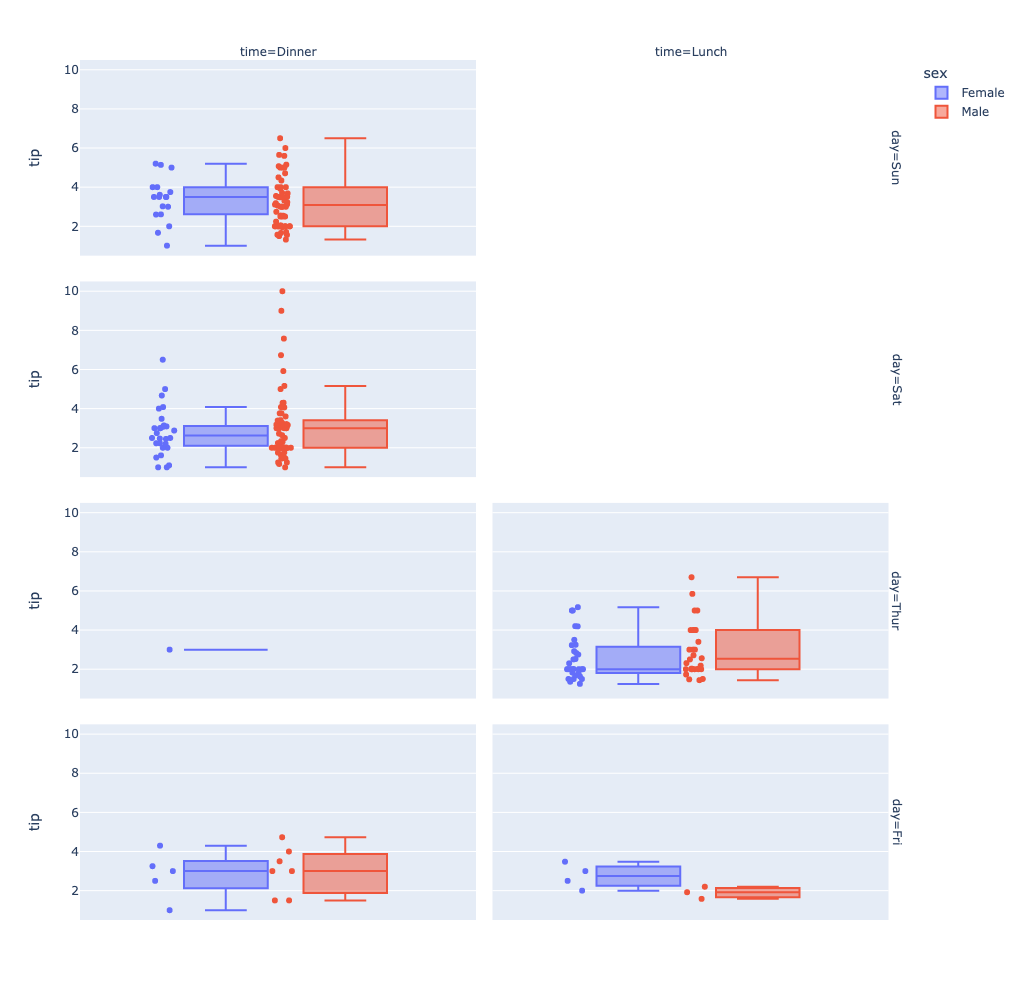

In [126]:
df.plot.box(backend='plotly',facet_col='time', facet_row='day',y='tip',color='sex',points='all',width=1000,height=1000)

### plotly: 시간,성별,요일,흡연에 따른 팁의 박스플랏

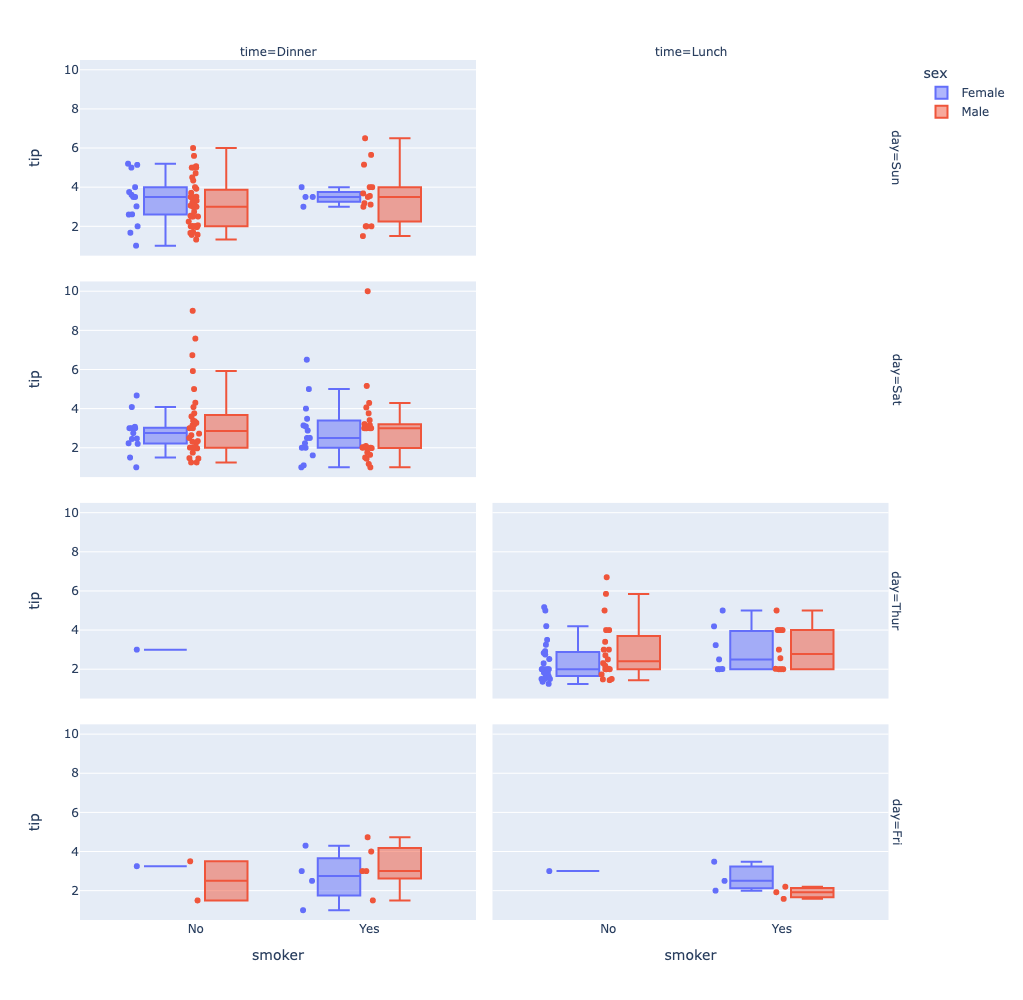

In [130]:
df.plot.box(backend='plotly',facet_col='time', facet_row='day',x='smoker',y='tip',color='sex',points='all',width=1000,height=1000)

## histogram

### data4: 인사자료 

In [133]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/_notebooks/HRDataset_v14.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


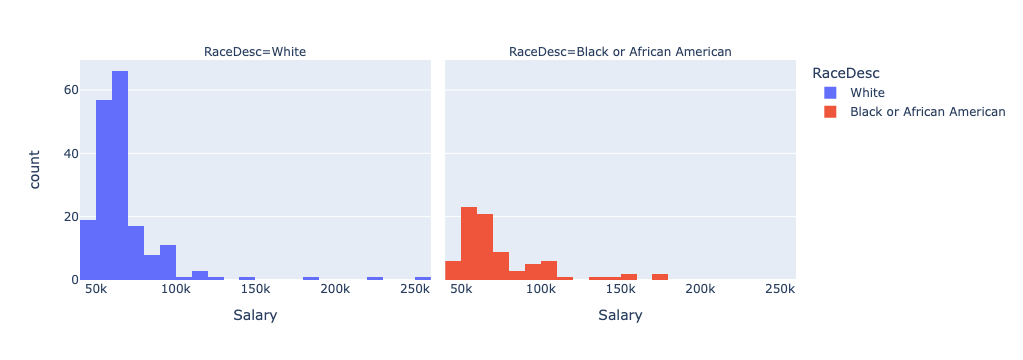

In [142]:
df.query(
    123
    'RaceDesc == "Black or African American" or RaceDesc == "White"')\
.plot.hist(backend='plotly',x='Salary',color='RaceDesc',facet_col='RaceDesc')

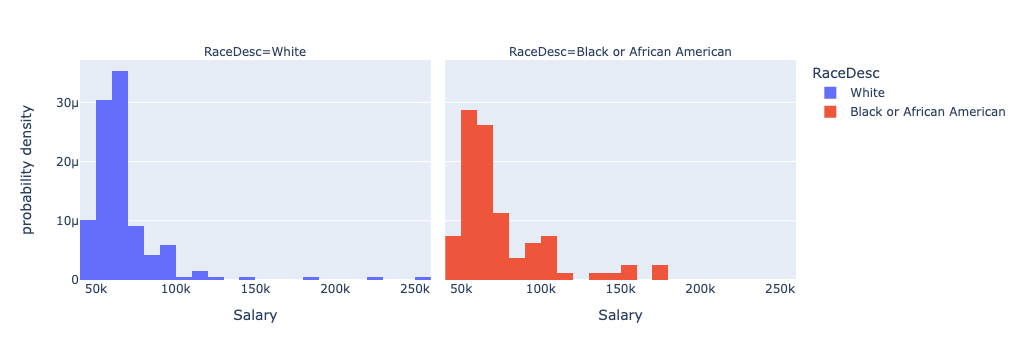

In [143]:
df.query('RaceDesc == "Black or African American" or RaceDesc == "White"')\
.plot.hist(backend='plotly',x='Salary',color='RaceDesc',facet_col='RaceDesc',histnorm = 'probability density')